(clustering)=
# Introducción.

En este módulo vamos a utilizar un modelo de optimización de con variables de tipo discreto, aunque realmente las variables van a ser binario (con valores 0 ó 1) a las que añadimos una restricción para que algunas de ellas valgan 1. Eso lo vemos en la exposición de la resolución del problema



En primer lugar creamos la función que va a ser la encargada de generar los puntos que después vamos a clasificar.

In [1]:
import numpy as np

def generate_points(centers, counts, scales):
    """Generamos puntos en un espacio bidimensional
    
    Args:
        centers: lista de pares que serán los centros de los cluster
        counts: lista conteniendo el número de puntos de cada cluster
        scales: Desviación estándar a tener en cuenta para generar los puntos.
        
    Returns:
        points: lista de los puntos (con un tamaño igual a la suma del tamaño de cada cluster)
    
    """
    centers = np.array(centers)
    points = np.zeros([sum(counts), 2])
    start = 0
    for center, count, scale in zip(centers, counts, scales):
        points[start:start + count] = center + np.random.normal(0, scale, size=[count, 2])
        start += count
    return points

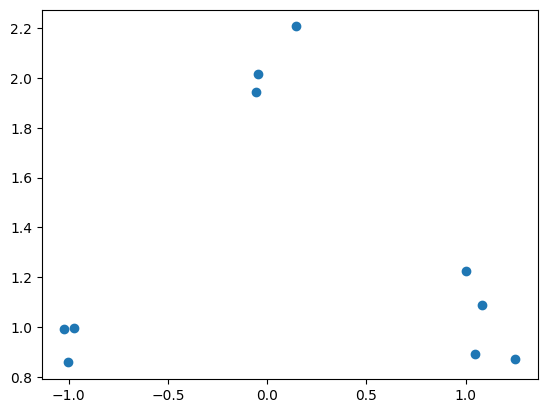

In [2]:
# tres clusters con 3,4 y 3 puntos cada uno
counts = [3, 4, 3]

num_points = sum(counts)
num_clusters = len(counts)

points = generate_points([(-1, 1), (1, 1), (0, 2)], counts, [0.1, 0.1, 0.1])

# obtenemos la distancia entre cada punto
distances = {(i, j): np.sqrt(np.sum(np.square(points[i] - points[j])))
            for i in range(num_points)
            for j in range(num_points)
            if i != j
            }

one_hot_penalty = 10

import matplotlib.pyplot as plt
plt.scatter(*zip(*points))

In [3]:
points

array([[-0.97364196,  0.99692865],
       [-1.00124489,  0.85792989],
       [-1.02138938,  0.9935812 ],
       [ 1.0844558 ,  1.08735894],
       [ 1.0450974 ,  0.89236925],
       [ 1.00101437,  1.22698843],
       [ 1.24970983,  0.87214967],
       [-0.04712933,  2.01777102],
       [ 0.14536791,  2.20676083],
       [-0.05612416,  1.9437752 ]])

In [5]:
points[1]-points[2]

array([-0.22886348, -0.04683578])

In [5]:
#distances

##  Creación del objeto BQM 

Creamos un objeto de tipo BQM con las siguientes características.

* La variables de decisión $x_{ij}$ van a valer 1 si el punto i es asignado al conglomerado j y cero en caso contrario.

* El número total de variables será igual al número de clúster multiplicado por el número de puntos.

* No hay ninguna incialización de los valores *bias* puesto que se asignan los mismos valores iniciales a todas las variables


In [7]:
#!pip install dimod

Para la generación de variables con Dewava se utiliza mucho el formato de representación de Python de tipo f'xxxx{}i', para el lector que no lo conozca a continuación se muestran una serie de ejemplos, que ayudan a comprender su uso.

In [8]:
i="casa"
f'aaaa_{i}'

'aaaa_casa'

In [9]:
# Otra forma es la siguiente
'aaa_{}'.format(i)

'aaa_casa'

A continuación implementado el modelo QUBO. Hay que observar que para definir las variables se crea un diccionario, de tal manera que los índices son los pares (i,j) que hacen referencia a la variable $x_{ij}$.

In [9]:
from dimod import AdjVectorBQM

# AdjVectorBQMy AdjDictBQM ahora son alias para BinaryQuadraticModely DictBQM respectivamente 
#en lugar de tener su propia implementación con una API ligeramente diferente

bqm = AdjVectorBQM('BINARY')
# Creamos el diccionario que contiene las variables
x = {(i, j): bqm.add_variable((f'x_{i}', j), 0) # Inicializamos con bias=0
     for i in range(num_points)
     for j in range(num_clusters)
     }

In [10]:
x

{(0, 0): ('x_0', 0),
 (0, 1): ('x_0', 1),
 (0, 2): ('x_0', 2),
 (1, 0): ('x_1', 0),
 (1, 1): ('x_1', 1),
 (1, 2): ('x_1', 2),
 (2, 0): ('x_2', 0),
 (2, 1): ('x_2', 1),
 (2, 2): ('x_2', 2),
 (3, 0): ('x_3', 0),
 (3, 1): ('x_3', 1),
 (3, 2): ('x_3', 2),
 (4, 0): ('x_4', 0),
 (4, 1): ('x_4', 1),
 (4, 2): ('x_4', 2),
 (5, 0): ('x_5', 0),
 (5, 1): ('x_5', 1),
 (5, 2): ('x_5', 2),
 (6, 0): ('x_6', 0),
 (6, 1): ('x_6', 1),
 (6, 2): ('x_6', 2),
 (7, 0): ('x_7', 0),
 (7, 1): ('x_7', 1),
 (7, 2): ('x_7', 2),
 (8, 0): ('x_8', 0),
 (8, 1): ('x_8', 1),
 (8, 2): ('x_8', 2),
 (9, 0): ('x_9', 0),
 (9, 1): ('x_9', 1),
 (9, 2): ('x_9', 2)}

In [17]:
x[(0,0]

('x_0', 0)

Realmente interesa ver el objeto de tipo BQM que hemos generado. Veámoslo con la siguiente instrucción:

In [12]:
bqm

Float64BQM({('x_0', 0): 0.0, ('x_0', 1): 0.0, ('x_0', 2): 0.0, ('x_1', 0): 0.0, ('x_1', 1): 0.0, ('x_1', 2): 0.0, ('x_2', 0): 0.0, ('x_2', 1): 0.0, ('x_2', 2): 0.0, ('x_3', 0): 0.0, ('x_3', 1): 0.0, ('x_3', 2): 0.0, ('x_4', 0): 0.0, ('x_4', 1): 0.0, ('x_4', 2): 0.0, ('x_5', 0): 0.0, ('x_5', 1): 0.0, ('x_5', 2): 0.0, ('x_6', 0): 0.0, ('x_6', 1): 0.0, ('x_6', 2): 0.0, ('x_7', 0): 0.0, ('x_7', 1): 0.0, ('x_7', 2): 0.0, ('x_8', 0): 0.0, ('x_8', 1): 0.0, ('x_8', 2): 0.0, ('x_9', 0): 0.0, ('x_9', 1): 0.0, ('x_9', 2): 0.0}, {}, 0.0, 'BINARY')

Las penalizaciones que imponemos van a ser proporcionales a la distancia que hay entre cada par de puntos

In [13]:
from itertools import combinations

for i, j in combinations(range(num_points), r=2):
    for k in range(num_clusters):
        bqm.add_interaction(x[i, k], x[j, k], distances[i, j])

In [14]:
distances[(0,1)]

0.14171301363998623

In [15]:
print(bqm)

Float64BQM({('x_0', 0): 0.0, ('x_0', 1): 0.0, ('x_0', 2): 0.0, ('x_1', 0): 0.0, ('x_1', 1): 0.0, ('x_1', 2): 0.0, ('x_2', 0): 0.0, ('x_2', 1): 0.0, ('x_2', 2): 0.0, ('x_3', 0): 0.0, ('x_3', 1): 0.0, ('x_3', 2): 0.0, ('x_4', 0): 0.0, ('x_4', 1): 0.0, ('x_4', 2): 0.0, ('x_5', 0): 0.0, ('x_5', 1): 0.0, ('x_5', 2): 0.0, ('x_6', 0): 0.0, ('x_6', 1): 0.0, ('x_6', 2): 0.0, ('x_7', 0): 0.0, ('x_7', 1): 0.0, ('x_7', 2): 0.0, ('x_8', 0): 0.0, ('x_8', 1): 0.0, ('x_8', 2): 0.0, ('x_9', 0): 0.0, ('x_9', 1): 0.0, ('x_9', 2): 0.0}, {(('x_1', 0), ('x_0', 0)): 0.14171301363998623, (('x_1', 1), ('x_0', 1)): 0.14171301363998623, (('x_1', 2), ('x_0', 2)): 0.14171301363998623, (('x_2', 0), ('x_0', 0)): 0.04786461576403033, (('x_2', 0), ('x_1', 0)): 0.13713890777482518, (('x_2', 1), ('x_0', 1)): 0.04786461576403033, (('x_2', 1), ('x_1', 1)): 0.13713890777482518, (('x_2', 2), ('x_0', 2)): 0.04786461576403033, (('x_2', 2), ('x_1', 2)): 0.13713890777482518, (('x_3', 0), ('x_0', 0)): 2.060083502578733, (('x_3',

## Restricción.

Añadimos la restricción para conseguir que las variables sean discretas, para ello debemos conseguir que para cara puntoa (es decir para cada subíndice i) la suma en el suíndice j sea 1. de esta manera conseguimos que cada punto pertenezca a uno y solo uno de los clúster.


In [16]:
for i in range(num_points):
    bqm.add_linear_equality_constraint(
        [(x[i, k], 1.0) for k in range(num_clusters)],
        constant=-1.0,
        lagrange_multiplier=one_hot_penalty
    )

## Resolución.
```{index} SimulatedAnnealingSampler
```

Utilizamos ahora el solver SimulatedAnnealingSampler,

In [17]:
from neal import SimulatedAnnealingSampler


response = SimulatedAnnealingSampler().sample(bqm, num_reads=100, num_sweeps=10000).truncate(3)
print(response)

  ('x_0', 0) ('x_0', 1) ('x_0', 2) ('x_1', 0) ... ('x_9', 2)   energy num_oc.
0          0          0          1          0 ...          0 2.611675       1
1          0          0          1          0 ...          0 2.611675       1
2          0          0          1          0 ...          0 2.611675       1
['BINARY', 3 rows, 3 samples, 30 variables]


In [18]:
response.first.sample

{('x_0', 0): 0,
 ('x_0', 1): 0,
 ('x_0', 2): 1,
 ('x_1', 0): 0,
 ('x_1', 1): 0,
 ('x_1', 2): 1,
 ('x_2', 0): 0,
 ('x_2', 1): 0,
 ('x_2', 2): 1,
 ('x_3', 0): 1,
 ('x_3', 1): 0,
 ('x_3', 2): 0,
 ('x_4', 0): 1,
 ('x_4', 1): 0,
 ('x_4', 2): 0,
 ('x_5', 0): 1,
 ('x_5', 1): 0,
 ('x_5', 2): 0,
 ('x_6', 0): 1,
 ('x_6', 1): 0,
 ('x_6', 2): 0,
 ('x_7', 0): 0,
 ('x_7', 1): 1,
 ('x_7', 2): 0,
 ('x_8', 0): 0,
 ('x_8', 1): 1,
 ('x_8', 2): 0,
 ('x_9', 0): 0,
 ('x_9', 1): 1,
 ('x_9', 2): 0}

In [19]:
best_solution = response.first.sample
assignments = {point: cluster for (point, cluster), value in best_solution.items() if value}

print(assignments)

{'x_0': 2, 'x_1': 2, 'x_2': 2, 'x_3': 0, 'x_4': 0, 'x_5': 0, 'x_6': 0, 'x_7': 1, 'x_8': 1, 'x_9': 1}


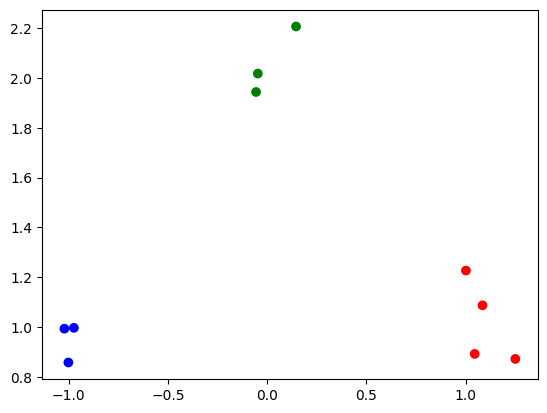

In [20]:
colors = ['r', 'g', 'b']
point_colors = [colors[assignments['x_{}'.format(i)]] for i in range(len(points))]
plt.scatter(*zip(*points), c=point_colors)

## Otro ejemplo.

Ahora hacemos lo mismo que antes, pero con otro conjunto de datos

In [21]:
import numpy as np

origenes = np.array([[1,1],[6,6]])
puntos = np.array([[11,10],[2,1],[1.5,2],[3,2],[0,1],[0.5,1],[7,6],[8,7],[5,6],[8,7],[6,8],[7,7],[2,2],[11,11]])

In [22]:
distances = {(i, j): np.sqrt(np.sum(np.square(puntos[i] - puntos[j])))+
             np.sqrt(np.sum(((puntos[1]+puntos[2])/2)-origenes[0]))
            for i in range(len(puntos))
            for j in range(len(puntos))
            if i != j
            }



In [23]:
np.sqrt(np.sum(((puntos[1]+puntos[2])/2)-origenes[0]))

1.118033988749895

In [24]:
#distances

In [25]:
from dimod import AdjVectorBQM

bqm = AdjVectorBQM('BINARY')
num_clusters = 2
x = {(i, j): bqm.add_variable((f'x_{i}', j), 0)
     for i in range(len(puntos))
     for j in range(num_clusters)
     }

In [26]:
from itertools import combinations

for i, j in combinations(range(len(puntos)), r=2):
    for k in range(num_clusters):
        bqm.add_interaction(x[i, k], x[j, k], distances[i, j])

In [27]:
one_hot_penalty = 100

for i in range(len(puntos)):
    bqm.add_linear_equality_constraint(
        [(x[i, k], 1.0) for k in range(num_clusters)],
        constant=-1.0,
        lagrange_multiplier=one_hot_penalty
    )

In [28]:
bqm.add_linear_equality_constraint(
   [(x[i, 0], 1.0) for i in range(len(puntos))],
        constant=-int(len(puntos)/2),
        lagrange_multiplier=one_hot_penalty 
)

In [29]:
from neal import SimulatedAnnealingSampler


response = SimulatedAnnealingSampler().sample(bqm, num_reads=100, num_sweeps=10000).truncate(3)
print(response)

  ('x_0', 0) ('x_0', 1) ('x_1', 0) ('x_1', 1) ... ('x_9', 1)     energy num_oc.
0          1          0          0          1 ...          0 172.385484       1
1          1          0          0          1 ...          0 172.385484       1
2          1          0          0          1 ...          0 172.385484       1
['BINARY', 3 rows, 3 samples, 28 variables]


In [30]:
best_solution = response.first.sample
assignments = {point: cluster for (point, cluster), value in best_solution.items() if value}

print(assignments)

{'x_0': 0, 'x_1': 1, 'x_10': 0, 'x_11': 0, 'x_12': 1, 'x_13': 0, 'x_2': 1, 'x_3': 1, 'x_4': 1, 'x_5': 1, 'x_6': 0, 'x_7': 0, 'x_8': 1, 'x_9': 0}


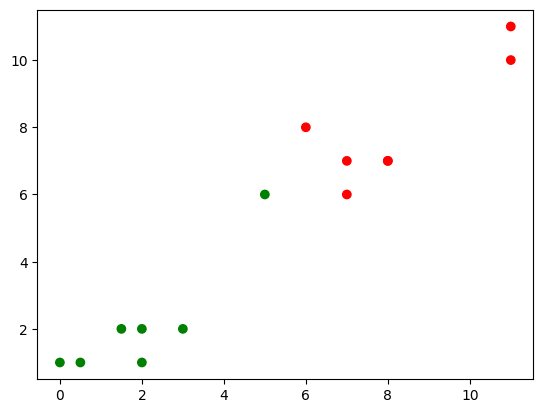

In [31]:
import matplotlib.pyplot as plt
colors = ['r', 'g', 'b']
point_colors = [colors[assignments['x_{}'.format(i)]] for i in range(len(puntos))]
plt.scatter(*zip(*puntos), c=point_colors)

## Otra prueba

In [55]:
origenes = np.array([[1,1],[6,6]])
puntos = np.array([[1,0],[2,1],[1.5,2],[3,2],[0,1],[0.5,1],[7,6],[8,7],[5,6],[8,7],[6,8],[7,7]])

In [56]:
distances = {(i, j): np.sqrt(np.sum(np.square(puntos[i] - puntos[j])))
            for i in range(len(puntos))
            for j in range(len(puntos))
            if i != j
            }

one_hot_penalty = 10

In [58]:
#distances

In [59]:
from dimod import AdjVectorBQM
num_clusters = 2
bqm = AdjVectorBQM('BINARY')

x = {(i, j): bqm.add_variable((f'x_{i}', j), 0)
     for i in range(len(puntos))
     #for j in range(num_clusters-1)
     for j in range(num_clusters)
     }


In [60]:
#x

In [61]:
from itertools import combinations

for i, j in combinations(range(num_points), r=2):
    for k in range(num_clusters):
        bqm.add_interaction(x[i, k], x[j, k], distances[i, j])
        
        
from itertools import combinations


In [62]:
print(bqm)

AdjVectorBQM({('x_0', 0): 0.0, ('x_0', 1): 0.0, ('x_1', 0): 0.0, ('x_1', 1): 0.0, ('x_2', 0): 0.0, ('x_2', 1): 0.0, ('x_3', 0): 0.0, ('x_3', 1): 0.0, ('x_4', 0): 0.0, ('x_4', 1): 0.0, ('x_5', 0): 0.0, ('x_5', 1): 0.0, ('x_6', 0): 0.0, ('x_6', 1): 0.0, ('x_7', 0): 0.0, ('x_7', 1): 0.0, ('x_8', 0): 0.0, ('x_8', 1): 0.0, ('x_9', 0): 0.0, ('x_9', 1): 0.0, ('x_10', 0): 0.0, ('x_10', 1): 0.0, ('x_11', 0): 0.0, ('x_11', 1): 0.0}, {(('x_0', 0), ('x_1', 0)): 1.4142135623730951, (('x_0', 0), ('x_2', 0)): 2.0615528128088303, (('x_0', 0), ('x_3', 0)): 2.8284271247461903, (('x_0', 0), ('x_4', 0)): 1.4142135623730951, (('x_0', 0), ('x_5', 0)): 1.118033988749895, (('x_0', 0), ('x_6', 0)): 8.48528137423857, (('x_0', 0), ('x_7', 0)): 9.899494936611665, (('x_0', 0), ('x_8', 0)): 7.211102550927978, (('x_0', 1), ('x_1', 1)): 1.4142135623730951, (('x_0', 1), ('x_2', 1)): 2.0615528128088303, (('x_0', 1), ('x_3', 1)): 2.8284271247461903, (('x_0', 1), ('x_4', 1)): 1.4142135623730951, (('x_0', 1), ('x_5', 1)):

In [63]:
one_hot_penalty = 28
for i in range(len(puntos)):
    bqm.add_linear_equality_constraint(
        [(x[i, k], 1.0) for k in range(num_clusters)],
        constant=-1.0,
        lagrange_multiplier=one_hot_penalty
    )

In [64]:
#for i in range(len(puntos)):
bqm.add_linear_equality_constraint(
    [(x[i, 1], 1.0) for i in range(len(puntos))],
    constant=-int(len(puntos)/2),
    lagrange_multiplier=one_hot_penalty
)

In [65]:
from neal import SimulatedAnnealingSampler


response = SimulatedAnnealingSampler().sample(bqm, num_reads=100, num_sweeps=10000).truncate(3)
print(response)

  ('x_0', 0) ('x_0', 1) ('x_1', 0) ('x_1', 1) ... ('x_9', 1)    energy num_oc.
0          1          0          1          0 ...          1 32.517029       1
1          1          0          1          0 ...          1 32.517029       1
2          1          0          1          0 ...          1 32.517029       1
['BINARY', 3 rows, 3 samples, 24 variables]


In [66]:
best_solution = response.first.sample
assignments = {point: cluster for (point, cluster), value in best_solution.items() if value}

print(assignments)

{'x_0': 0, 'x_1': 0, 'x_10': 1, 'x_11': 1, 'x_2': 0, 'x_3': 0, 'x_4': 0, 'x_5': 0, 'x_6': 1, 'x_7': 1, 'x_8': 1, 'x_9': 1}


In [67]:
best_solution

{('x_0', 0): 1,
 ('x_0', 1): 0,
 ('x_1', 0): 1,
 ('x_1', 1): 0,
 ('x_10', 0): 0,
 ('x_10', 1): 1,
 ('x_11', 0): 0,
 ('x_11', 1): 1,
 ('x_2', 0): 1,
 ('x_2', 1): 0,
 ('x_3', 0): 1,
 ('x_3', 1): 0,
 ('x_4', 0): 1,
 ('x_4', 1): 0,
 ('x_5', 0): 1,
 ('x_5', 1): 0,
 ('x_6', 0): 0,
 ('x_6', 1): 1,
 ('x_7', 0): 0,
 ('x_7', 1): 1,
 ('x_8', 0): 0,
 ('x_8', 1): 1,
 ('x_9', 0): 0,
 ('x_9', 1): 1}

(conDQM)=
###Con DQM

Vamos a cambiar un poco el ejemplo anterior, y vamos a suponer que tenemos dos coches ubicados en un lugar definido por unas coordenadas. Después tenemos otros coches en otros puntos, también definidos por un par de coordenadas. 

A cada coche le vamos a dar una preferencia de asignación a un coche u otro. Esta preferencia está dada por un par de valores, cada valor del par indica la preferencia por un coche u otro. Un valor más pequeño indica mayor preferencia (esto es debido a que al fina la ecuación que tratamos es de minimización). 

Formulamos todo esto de la siguiente manera

In [39]:
from dimod import DiscreteQuadraticModel
from dwave.system import LeapHybridDQMSampler

In [40]:
sampler = LeapHybridDQMSampler()

In [34]:
origenes = np.array([[1,1],[6,6]]) # Los orígenes de los coches
puntos = np.array([[6.5,10],[2,1],[1.5,2],[3,2],[0,1],[0.5,1],[7,6],[8,7],[5,6],[8,7],[6,8],[7,7]])

Al final veo que lo de la celda anterior no lo utilizo para este caso, pero sí sería necesario cuando se calculen de forma programática las preferencias de cada punto.
Las preferencias para este ejemplo lo asigno de forma manual en la siguiente celda, utilizo como criterio la cercanía de un punto a cada uno de los coches.

In [43]:
preferences = { "y_1": [2,1],
                "y_2":[1,2],
                "y_3" :[1,2],
                "y_4": [1,2],
                "y_5": [1,2],
                "y_6" : [1,2],
                "y_7":[2,1],
                "y_8":[2,1],
               "y_9":[2,1],
               "y_10":[2,1],
               "y_11":[2,1],
               "y_12":[2,1]
              }

In [44]:
num_coches = 2
dqm = DiscreteQuadraticModel()

Para ver la propiedad *add_variable* <a href="https://docs.ocean.dwavesys.com/en/stable/docs_dimod/reference/generated/dimod.DiscreteQuadraticModel.add_variable.html" target="_blank"> ver este enlace</a>:

In [45]:
#Creamos las variables  del modelo
for name in preferences:
        
        dqm.add_variable(num_coches, label=name)
        

In [49]:
#Sacamos el número de variables
print(dqm.num_variables() )

12


In [89]:
for name in preferences:
        dqm.set_linear(name, preferences[name])

Resolvemos el problema

In [50]:
sampleset = sampler.sample_dqm(dqm, label='Training - Asignacion puntos')

In [51]:
sampleset

SampleSet(rec.array([([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1], 0., 1),
           ([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1], 0., 1),
           ([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1], 0., 1),
           ([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1], 0., 1),
           ([1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0], 0., 1),
           ([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0], 0., 1),
           ([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1], 0., 1),
           ([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1], 0., 1),
           ([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1], 0., 1),
           ([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0], 0., 1),
           ([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0], 0., 1),
           ([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0], 0., 1),
           ([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0], 0., 1),
           ([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], 0., 1),
           ([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1], 0., 1),
           ([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1], 0., 1),
           ([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1], 0., 1),
    

In [52]:
sample = sampleset.first.sample
shift_schedule=[ [] for i in range(num_coches)]
for key, val in sample.items():
        shift_schedule[val].append(key)
        
shift_schedule

[['y_1', 'y_2', 'y_3', 'y_9', 'y_10'],
 ['y_4', 'y_5', 'y_6', 'y_7', 'y_8', 'y_11', 'y_12']]

In [53]:
sample.items()

dict_items([('y_1', 0), ('y_2', 0), ('y_3', 0), ('y_4', 1), ('y_5', 1), ('y_6', 1), ('y_7', 1), ('y_8', 1), ('y_9', 0), ('y_10', 0), ('y_11', 1), ('y_12', 1)])

## Otra forma con DQM.

En esta ocasión voy a utilizar la información que me dan las distancias a cada centro de salida

In [1]:
import numpy as np

origenes = np.array([[1,1],[6,6]])
puntos = np.array([[6.5,10],[2,1],[1.5,2],[3,2],[0,1],[0.5,1],[7,6],[8,7],[5,6],[8,7],[6,8],[7,7]])

In [2]:
distances = {(i, j): np.sqrt(np.sum(np.square(puntos[i] - origenes[j])))
            for i in range(len(puntos))
            for j in range(len(origenes))
            #if i != j
            }

In [3]:
n_coches = len(origenes)


In [4]:
from dimod import DiscreteQuadraticModel
from dwave.system import LeapHybridDQMSampler

In [5]:
dqm=DiscreteQuadraticModel()

In [6]:
for punto in range(len(puntos)):
    dqm.add_variable(n_coches,label=punto)

In [8]:
# Cosntruimos la función objetivo
for punto in range(len(puntos)):
    #for coche in range(len(origenes)):
    dqm.set_linear_case(punto,0,distances[punto,0])

In [9]:
gamma = 20


In [10]:
for i in range(len(puntos)):
    dqm.set_linear_case(i,0,gamma)
    dqm.set_linear_case(i,1,gamma)
    for j in range(i+1, len(puntos)):
        dqm.set_quadratic_case(i,0,j,0,2*gamma)
        dqm.set_quadratic_case(i,1,j,1,2*gamma)
        dqm.set_quadratic_case(i,0,j,1,-2*gamma)
        dqm.set_quadratic_case(i,1,j,0,-2*gamma)
        

In [11]:
sampler = LeapHybridDQMSampler()
sampleset = sampler.sample_dqm(dqm, label='distribucion puntos coche')

In [12]:
sample = sampleset.first.sample
sample

{0: 0, 1: 0, 2: 1, 3: 1, 4: 0, 5: 0, 6: 0, 7: 1, 8: 1, 9: 1, 10: 1, 11: 0}

In [ ]:
distances

In [13]:
sampleset

SampleSet(rec.array([([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0],   0., 1),
           ([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0],   0., 1),
           ([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0],   0., 1),
           ([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0],   0., 1),
           ([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0],   0., 1),
           ([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0],   0., 1),
           ([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1],   0., 1),
           ([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0],   0., 1),
           ([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0],   0., 1),
           ([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1],   0., 1),
           ([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],   0., 1),
           ([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0],   0., 1),
           ([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0], 320., 1),
           ([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0],   0., 1),
           ([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0],  80., 1),
           ([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0],   0., 1),
           ([0, 1, 1, 1, 1, 0,